# Front page example (XGBoost)

The code from the front page example using XGBoost.

In [8]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.XGBRegressor(max_depth=1).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.TabularPartitions(X, sample=100)
explainer = shap.Explainer(model.predict, background, link=shap.links.logit)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

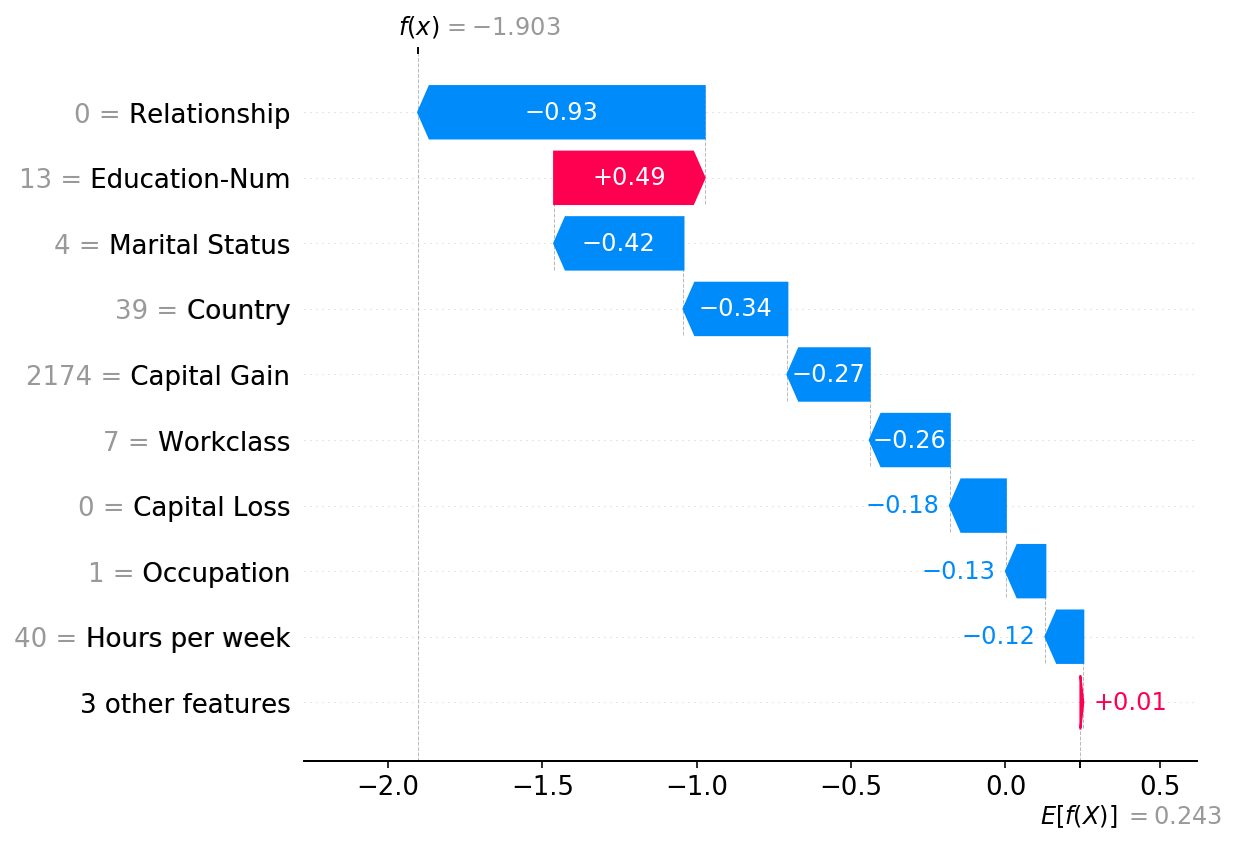

In [19]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(max_depth=1, learning_rate=0.5).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.TabularPartitions(X, sample=100)
def f(x):
    return shap.links.identity(model.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [20]:
f(background.data).mean()

0.24263532

In [20]:
f(background.data).mean()

0.24263532

In [21]:
shap_values.expected_value

0.242635348305339

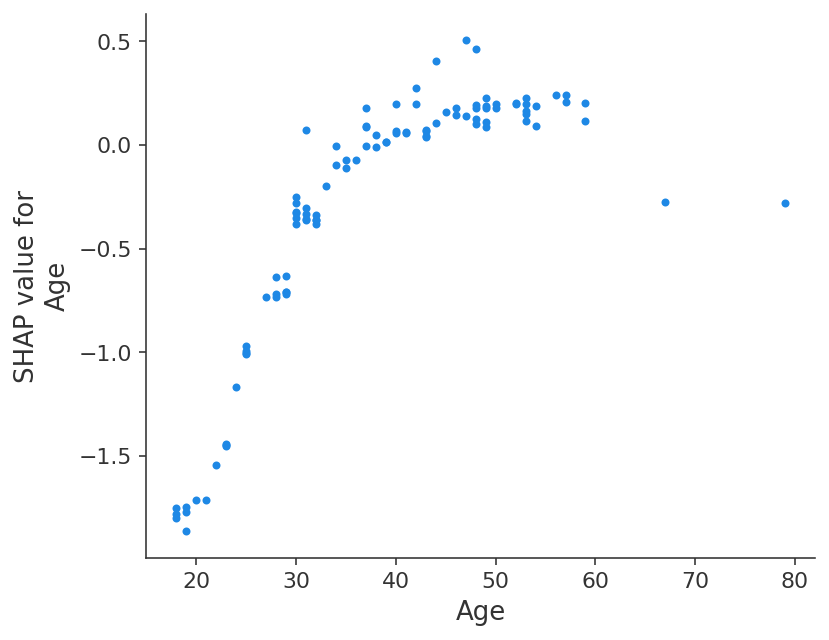

In [22]:
shap.plots.dependence(shap_values[:,"Age"])

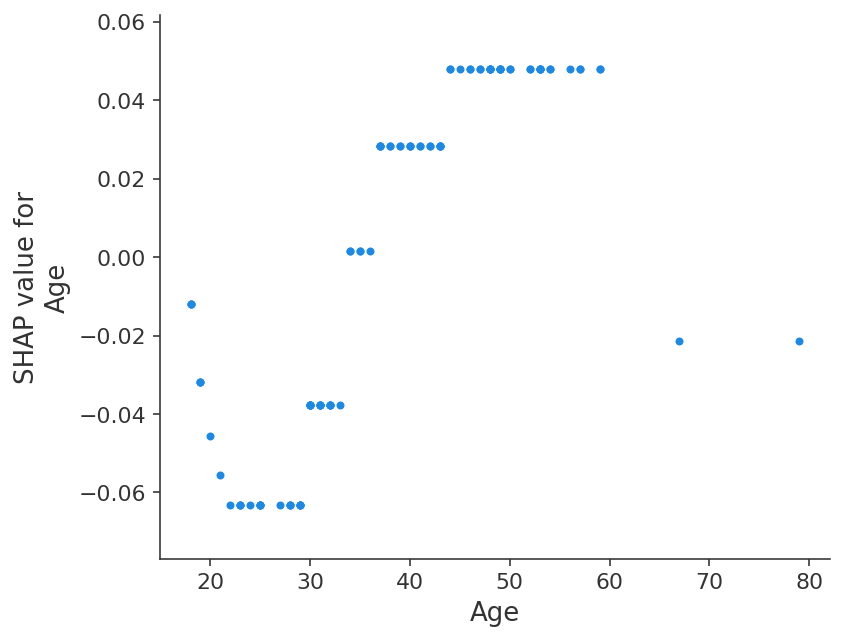

In [15]:
shap.plots.dependence(shap_values[:,"Age"])

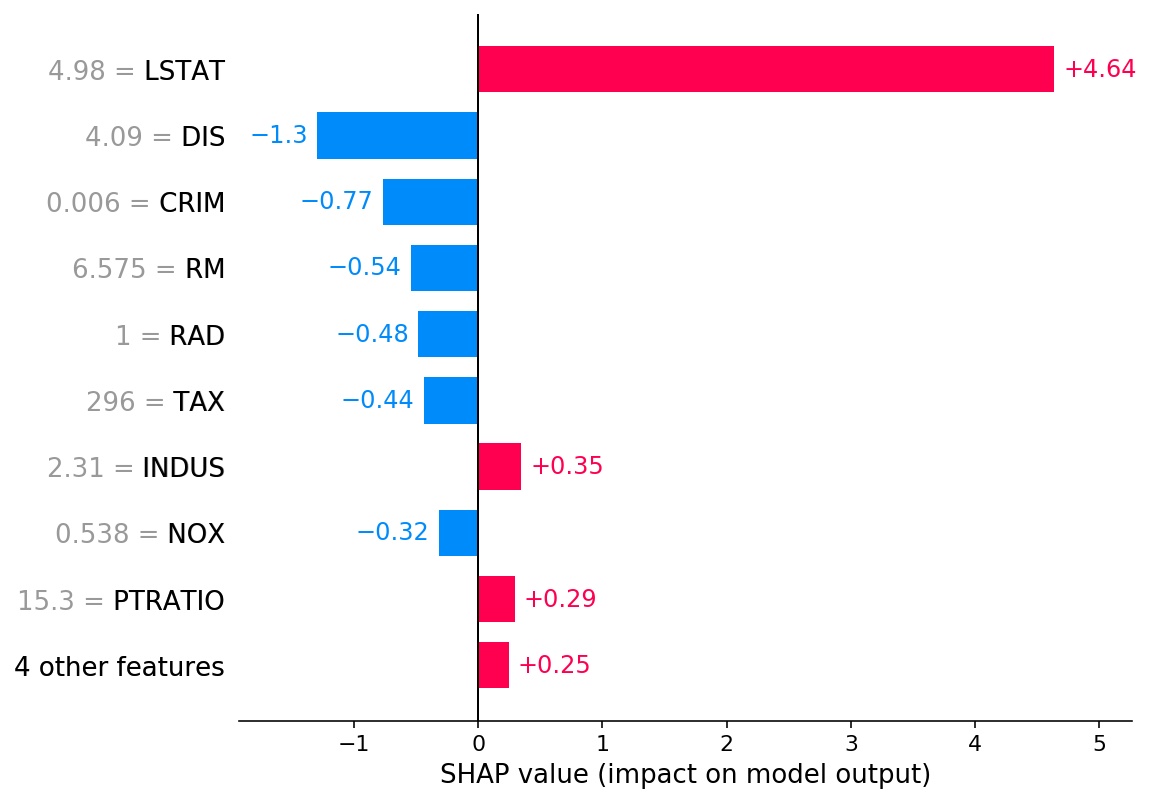

In [2]:
# plot the global importance of each feature
shap.plots.bar(shap_values[0])

In [3]:
shap.plots.initjs()

# visualize the first prediction's explanation
shap.plots.force(shap_values[0])

In [4]:
# visualize the first prediction's explanation
shap.plots.force(shap_values)

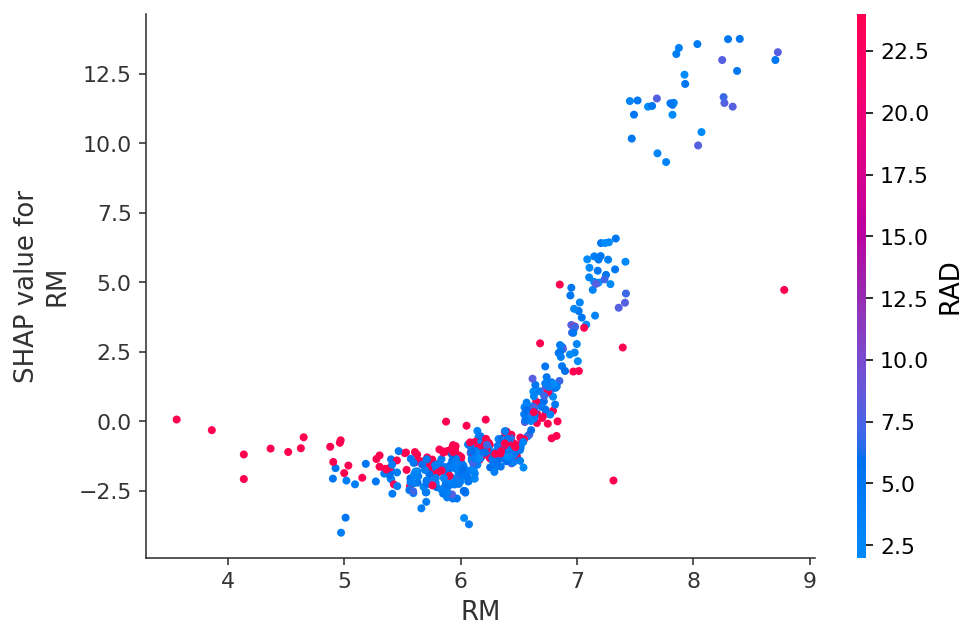

In [5]:
# plot the importance of a single feature across all samples
shap.plots.dependence(shap_values[:,"RM"], color=shap_values)

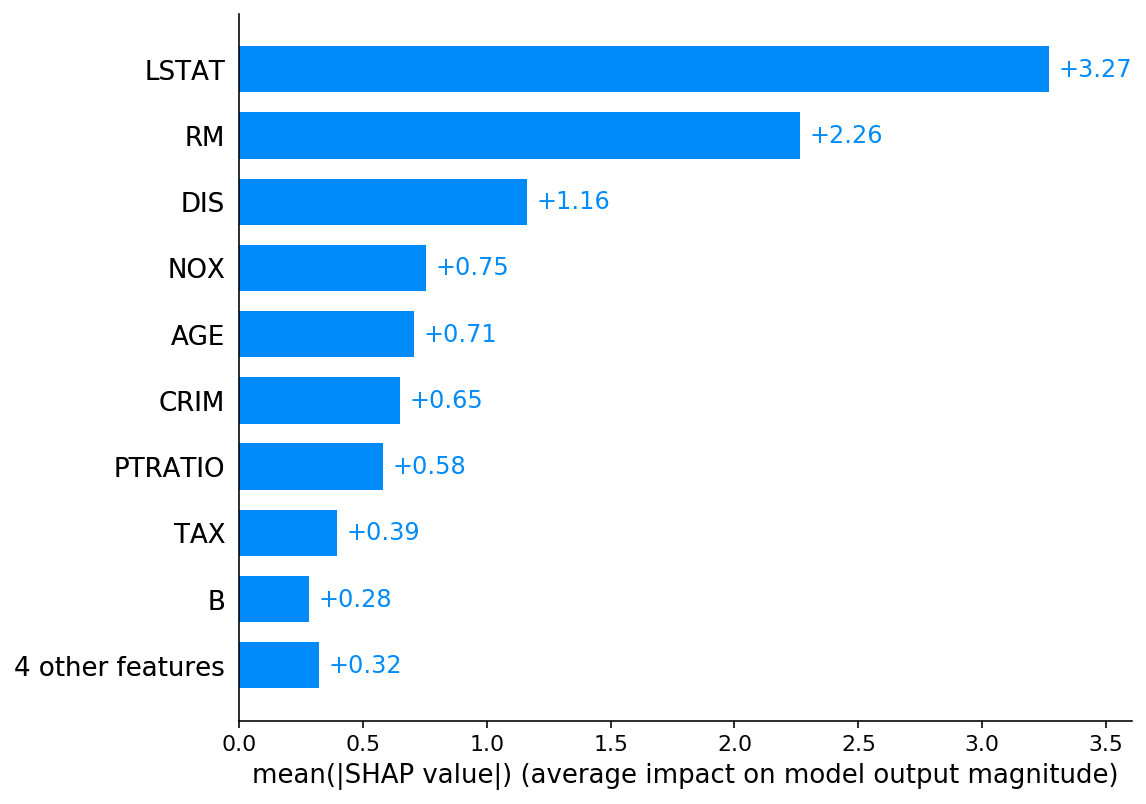

In [6]:
# plot the global importance of each feature
shap.plots.bar(shap_values)

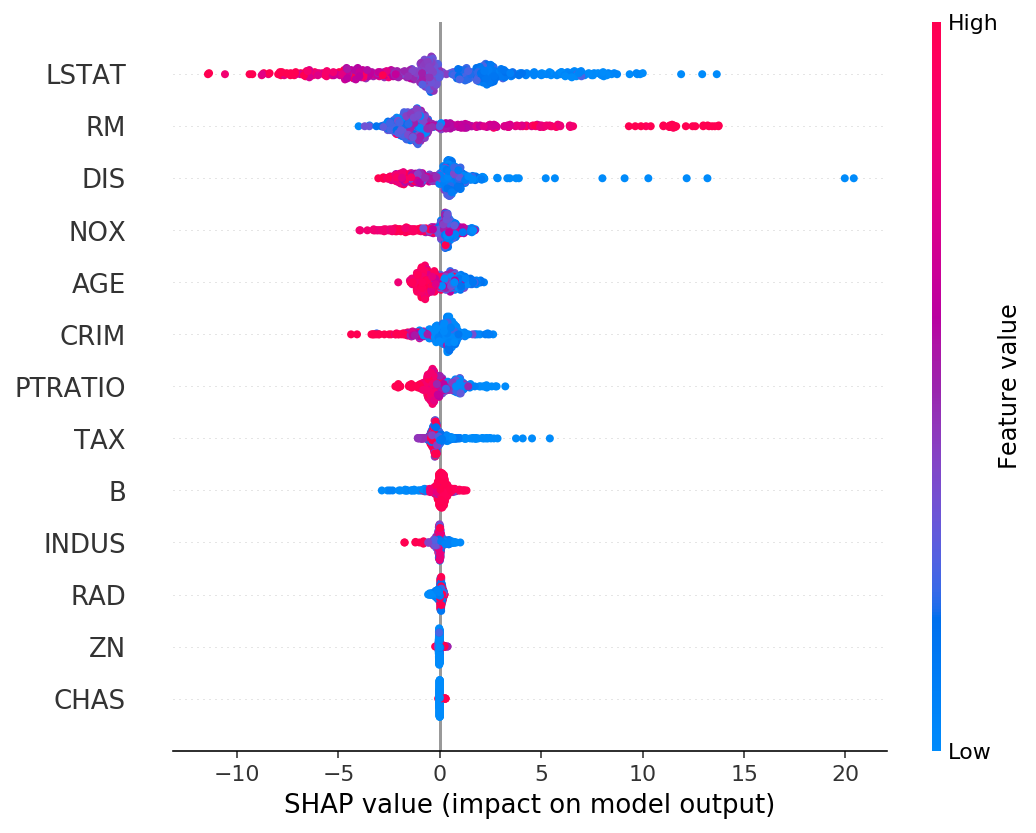

In [7]:
# plot the distribution of importances for each feature over all samples
shap.plots.summary(shap_values)